# 170671 Shivam Pandey
# CE678A Lab5

In [2]:
# Load modules
addpath(genpath('./SHBundle/'));
addpath(genpath('./uberall/'));
addpath(genpath('./visBundle/'));
addpath(genpath('./gracebundle-master/'));

In [3]:
help gshs_

'gshs_' is a function from the file /home/shivam/2020-21-1/CE678A/ce678a/lab5/SHBundle/gshs_.m

 GSHS global spherical harmonic synthesis 

 f = gshs(field)

 IN:
    field ....... set of SH coefficients, either in |c\s| or /s|c\ format
 OPTIONAL:
    'max_lm' .... maximum degree/order (default: determined from field)
    'quant' ..... optional string argument, defining the field quantity:
                  - 'potential' ........ (default), potential [m^2/s^2],
                  - 'tr' ............... grav. disturbance, 1st rad. derivative [mGal],
                  - 'trr' .............. 2nd rad. derivative [E],
                  - 'none' ............. coefficients define the output
                  - 'geoid' ............ geoid height [m],
                  - 'dg', 'gravity' .... gravity anomaly [mGal], 
                  - 'slope' ............ size of surface gradient [arcsec], 
                  - 'water' ............ equiv. water height [m],
                  - 'smd' ..............

In [4]:
sh_coeff = parse_icgem('./ggm05g.gfc');

parsing file "./ggm05g.gfc"...
params =

  scalar structure containing the fields:

    max_lm =  Inf
    min_lm = 0
    verbose = 0
    warning = 1
    display_warning = 1
    sub_wgs84 = 0



In [5]:
Ls = sh_coeff(:, 1);
Ms = sh_coeff(:, 2);

### The header shown above represents the maximmum and minimum lm and specifies the display\_warning status probably debug or production code.

In [6]:
# change clm to sc format
sc = clm2sc(sh_coeff);

params =

  scalar structure containing the fields:

    max_lm =  Inf
    gcoef2sc = 0
    display_warning = 1
    sub_wgs84 = 0



In [7]:
[r, c] = size(sc)

r =  241
c =  481


In [8]:
sctriplot(sc, max(Ls), '');
title('SC plot for field');

In [9]:
# calculate field from sc values
[f, colat, long] = gshs_(sc);

    gshs_ at line 178 column 9
gshs ...   0% [                                2% [=                               3% [=                               4% [=                               5% [=                               6% [=                               7% [=                               8% [==                              9% [==                             10% [==                             11% [===                            12% [===                            13% [===                            14% [===                            15% [====                           16% [====                           17% [====                           18% [=====                          19% [=====                          20% [=====                          21% [======                         22% [======                         23% [======                         24% [======                         25% [=======                        26% [=======                        27% [=======           

In [10]:
# function for zeros calculation
# based on sign change of function
function n_zeros = get_zeros(val_vec)
    n_zeros = 0;
    prev = val_vec(1, 1);
    for i = val_vec(2:end, :)'
        if(i*prev < 0)
            n_zeros = (n_zeros + 1);
        end
        prev = i;
    endfor
    return;
endfunction

In [11]:
# define lm matrix
lm_mat = [20, 0;
        20, 7;
        20, 14;
        20, 20];

In [12]:
Plm = plm(lm_mat(1, 1), lm_mat(1, 2), colat);

Number of zeros in Plm curve:-	
 20


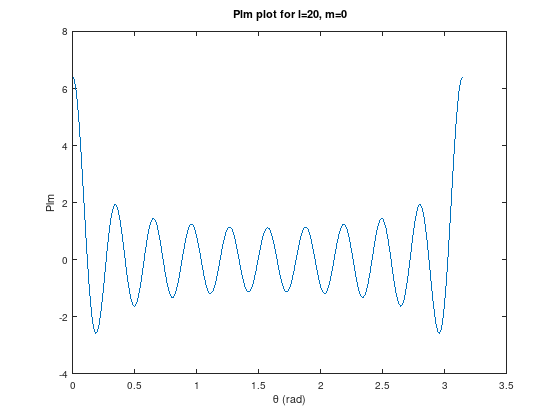

In [13]:
plot(colat, Plm);
xlabel('\theta (rad)');
ylabel('Plm');
title('Plm plot for l=20, m=0');
n_zeros = get_zeros(Plm);
disp("Number of zeros in Plm curve:-\t"), disp(n_zeros);

In [14]:
Plm = plm(lm_mat(2, 1), lm_mat(2, 2), colat);

Number of zeros in Plm curve:-	
 13


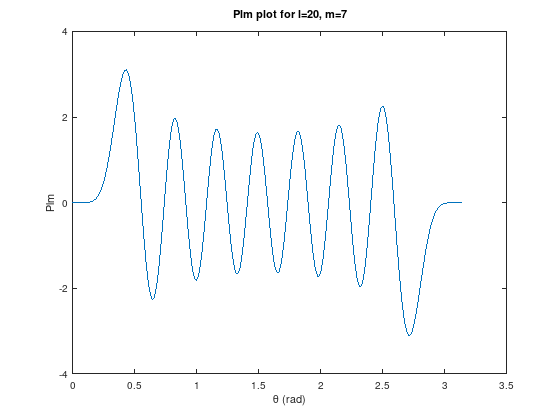

In [15]:
plot(colat, Plm)
xlabel('\theta (rad)');
ylabel('Plm');
title('Plm plot for l=20, m=7');
n_zeros = get_zeros(Plm);
disp("Number of zeros in Plm curve:-\t"), disp(n_zeros);

In [16]:
Plm = plm(lm_mat(3, 1), lm_mat(3, 2), colat);

Number of zeros in Plm curve:-	
 6


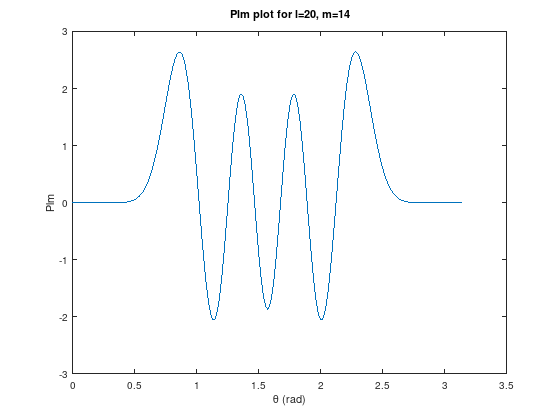

In [17]:
plot(colat, Plm);
xlabel('\theta (rad)');
ylabel('Plm');
title('Plm plot for l=20, m=14');
n_zeros = get_zeros(Plm);
disp("Number of zeros in Plm curve:-\t"), disp(n_zeros);

In [18]:
Plm = plm(lm_mat(4, 1), lm_mat(4, 2), colat);

Number of zeros in Plm curve:-	
0


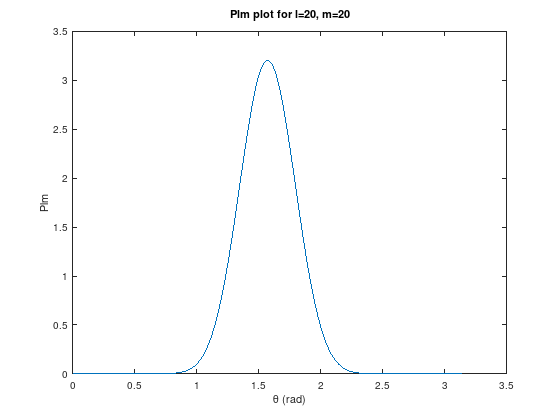

In [19]:
plot(colat, Plm);
xlabel('\theta (rad)');
ylabel('Plm');
title('Plm plot for l=20, m=20');
n_zeros = get_zeros(Plm);
disp("Number of zeros in Plm curve:-\t"), disp(n_zeros);

In [20]:
# define the grid points
thetaRad = linspace(0, 0.5*pi/180, 10);
lambRad = linspace(0, 0.5*pi/180, 10);

# meshgrid for plot
[X_theta, Y_lamb] = meshgrid(thetaRad, lambRad);
% X_theta = reshape(X_theta, [size(X_theta)(2)*size(X_theta)(1), 1]);
% [X_theta, idx] = sort(X_theta);
% Y_lamb = Y_lamb(idx);
% Y_lamb = reshape(Y_lamb, [size(Y_lamb)(2)*size(Y_lamb)(1), 1]);

In [21]:
# compute Ylm
[ylmc, ylms] = ylm(20, 7, thetaRad, lambRad);

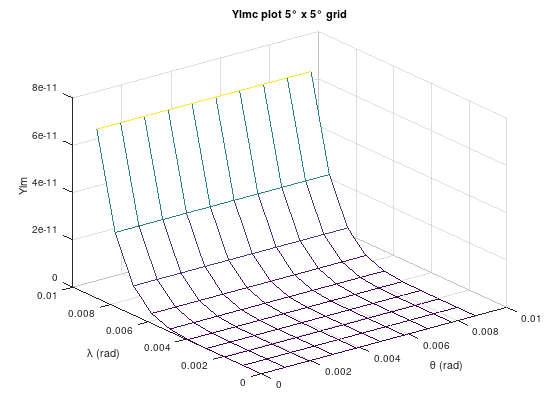

In [22]:
# plot mesh
mesh(X_theta, Y_lamb, ylmc);

xlabel('\theta (rad)');
ylabel('\lambda (rad)');
zlabel('Ylm');
title('Ylmc plot 5\deg x 5\deg grid');

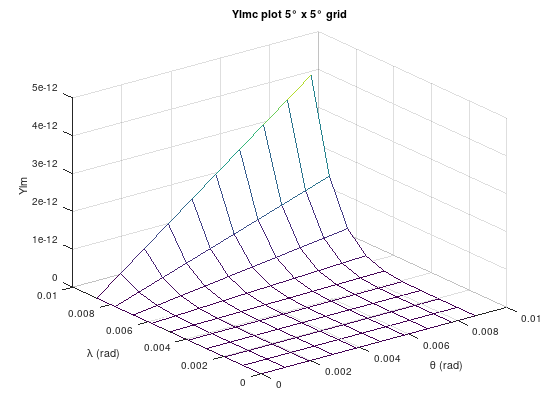

In [23]:
# plot Ylms
mesh(X_theta, Y_lamb, ylms);
xlabel('\theta (rad)');
ylabel('\lambda (rad)');
zlabel('Ylm');
title('Ylmc plot 5\deg x 5\deg grid');

### QUE4>1:- Go through the two algorithms that are given above and identify the major differences between the two algorithms.

### ANS:- 

#### The major difference b/w the two algorithms is that the first one computes sphericaal harmonic synthesis for pecified $\quad\theta\quad and\quad \lambda$ and the second one computes for a grid $\quad [\theta_{start}, \theta_{end}]x[\lambda_{start}, \lambda_{end}]$

### QUE4>2:- In the SHbundle these two algorithms are already programmed. Let us do the spherical harmonic analysis using those functions. The latitude, longitude and elevation of Kanpur are 26.449923 ◦ N, 80.331874 ◦ E and 126 m. Use the following command to compute the potentialat Kanpur.
### V_Kanpur = gshs_ptw(sc, longitude, latitude, r, 6378137, 'max_lm', 360, 'quant','potential', 'sub_WGS84', false) To understand the different parameters of the function, type help gshs_ptw at the Octave command prompt.

In [24]:
# define parameters
longitude = 26.449923*pi/180;
latitude = 80.331874*pi/180;
R = 6378137;
r = 6378137 + 126;
GM = (3.986004418 * 10^14);

# compute potential at kanpur
V_Kanpur = gshs_ptw(sc, longitude, latitude, r, 6378137, 'max_lm', 360, 'quant','potential', 'sub_WGS84', false);

### QUE4>3:- Compute the gravity value at Kanpur. How different is it from $\frac{9.81 m}{s^2}$

In [25]:
disp("ptential at kanpur:-\t"), disp(V_Kanpur);

ptential at kanpur:-	
 62429163.94013


In [26]:
# compute gravity acceleration for Knapur
g_kanpur = V_Kanpur/6378137;

disp("gravity acceleration at kanpur:-\t"), disp(g_kanpur);

gravity acceleration at kanpur:-	
 9.7880


### QUE4>4:- Compute the global field with gshs_

In [129]:
field = gshs_(sc);

    gshs_ at line 178 column 9
gshs ...   0% [                                2% [=                               3% [=                               4% [=                               5% [=                               6% [=                               7% [=                               8% [==                              9% [==                             10% [==                             11% [===                            12% [===                            13% [===                            14% [===                            15% [====                           16% [====                           17% [====                           18% [=====                          19% [=====                          20% [=====                          21% [======                         22% [======                         23% [======                         24% [======                         25% [=======                        26% [=======                        27% [=======           

error: load: unable to find file coast
error: called from
    mapfield at line 69 column 2


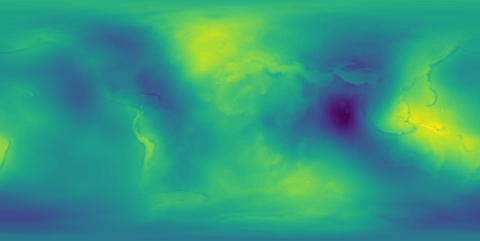

In [130]:
# plot the field with mapfield function
mapfield(field, 'neumann', 1);

In [131]:
function f = potential_ptw(sh_coeff, r, theta, lambda, GM, R)
    
    # conver to colatitude
    theta = pi/2 - theta;
    
    # get the GM/R as a single factor
    eta = GM/R;
    
    # get the harmonic parameters
    Klm = sh_coeff(:, 1:4);
    l_max = max(Klm(:, 1));
    m_max = max(Klm(:, 2));
    
    # define the range for l
    l_vec = [0:l_max];
    
    # get the Plm for each m values
    # makes computation faster
    Plm_vec = [];
    for m = 0:m_max
        Plm_ = plm(l_vec, m, theta);
        Plm_vec = [Plm_vec;Plm_];
    endfor
    
    # get the radial factor
    rad_factor = (R/r).^(l_vec.+1)';
    
    # initialize the field
    f = 0;
    for l = 0:l_max
        tmp = 0;
        for m = 0:m_max
            Klm_Tmp = Klm((Klm(:, 1) == l) & (Klm(:, 2) == m), :);
            if(size(Klm_Tmp)(2)>0)
                tmp = tmp + sum(Plm_vec(m+1, l+1).*(Klm_Tmp(:, 3).*cos(m*lambda) .+ Klm_Tmp(:, 4).*sin(m*lambda)))/rad_factor(l+1, 1);
            endif
        endfor
        f = f + rad_factor(l+1, 1)*tmp;
    endfor
    
    f = eta*f;
    return;
endfunction

In [136]:
f1 = potential_ptw(sh_coeff, r, latitude, longitude, GM, R);

In [138]:
knp_gravity_val = f1 / R;
disp("gravity acceleration value:-\t"), disp(knp_gravity_val);

gravity acceleration value:-	
 9.7882


`the above value of gravity field(9.7882) is within error limits of what we have found for the kanpur from GRACE-bundle(9.7880).`

In [156]:
function f_grid = potential_grid(sh_coeff, r, GM, R, grid_theta, grid_lambda, res)
    
    # get the theta and lambda grid values
    thetaRad = linspace(0, grid_theta*pi/180, res);
    lambRad = linspace(0, grid_lambda*pi/180, res);
    
    # get the grid 
    [X_theta, Y_lamb] = meshgrid(thetaRad, lambRad);
    req_size = size(X_theta);
    X_theta = reshape(X_theta, [size(X_theta)(2)*size(X_theta)(1), 1]);
    Y_lamb = reshape(Y_lamb, [size(Y_lamb)(2)*size(Y_lamb)(1), 1]);
    
    potential_field = [];
    
    # get the potential
    for i = 1:size(X_theta)(1)
        theta = (X_theta')(i);
        lambda = (Y_lamb')(i);
        f1 = potential_ptw(sh_coeff, r, theta, lambda, GM, R);
        potential_field = [potential_field;f1];
    endfor
    
%     size(potential_field)
    potential_field = reshape(potential_field, [req_size]);
    f_grid = potential_field;
    
    # convert to field
    f_grid = f_grid./(R);
    return;
endfunction

In [167]:
field1 = potential_grid(sh_coeff(1:500, :), r, GM, R, 0.5, 0.5, 10);

In [168]:
disp("gravity acceleration value:-\t"), disp(field1);

gravity acceleration value:-	
 Columns 1 through 8:

   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036
   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036   9.8036

 Columns 9 and 10:

   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
   9.8036   9.8036
